In [1]:
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

# Utilities for notebook visualization
import shapely.geometry
import IPython.display
from IPython.display import JSON
import matplotlib.pyplot as plt

In [2]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

<IPython.core.display.JSON object>

In [3]:
get_data_store_params_schema('smos')

In [4]:
store = new_data_store('smos')

In [5]:
store.get_open_data_params_schema()

In [6]:
JSON(store.list_data_ids())

<IPython.core.display.JSON object>

In [7]:
ds = store.open_data("SMOS-L2-SM", time_range=("2023-05-01", "2023-05-02"))

c:\users\norma\projects\xcube-smos\xcube_smos\l2cube.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  self.time_bnds = xr.DataArray(
c:\users\norma\projects\xcube-smos\xcube_smos\l2cube.py:71: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by 

In [8]:
ds

<xarray.Dataset>
Dimensions:                      (lat: 8064, lon: 16384, time: 13, bnds: 2)
Coordinates:
  * lat                          (lat) float64 88.58 88.56 ... -88.56 -88.58
  * lon                          (lon) float64 -180.0 -180.0 ... 180.0 180.0
  * time                         (time) datetime64[ns] 2023-05-01T01:54:46 .....
    time_bnds                    (time, bnds) datetime64[ns] 2023-05-01T01:28...
Dimensions without coordinates: bnds
Data variables: (12/72)
    AFP                          (time, lat, lon) float32 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    Altitude                     (time, lat, lon) float32 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    Chi_2                        (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    Chi_2_P                      (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    Confidence_Flags             (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    DGG_Current_Flags            (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    ...                           ...
    TB_TOA_Theta_B_V             (time, lat, lon) float32 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    TB_TOA_Theta_B_V_DQX         (time, lat, lon) float32 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    TTH                          (time, lat, lon) float32 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    TTH_DQX                      (time, lat, lon) float32 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    Tau_Cur_DQX                  (time, lat, lon) float32 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    X_Swath                      (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
Attributes: (12/439)
    FH:File_Class:                                                           ...
    FH:File_Description:                                                     ...
    FH:File_Name:                                                            ...
    FH:File_Type:                                                            ...
    FH:File_Version:                                                         ...
    FH:Mission:                                                              ...
    ...                                                                                                                         ...
    VH:SPH:QI:Percentage_Rejected_TBs:Due_To_TB_Range:                       ...
    VH:SPH:QI:Total_L1c_Nodes:                                               ...
    VH:SPH:QI:Total_Processed_L1c_Nodes:                                     ...
    VH:SPH:QI:Total_Retrieval_Attempted_L1c_Nodes:                           ...
    creation_date:                                                           ...
    total_number_of_grid_points:                                             ...

In [9]:
ds.Soil_Moisture

<xarray.DataArray 'Soil_Moisture' (time: 13, lat: 8064, lon: 16384)>
dask.array<where, shape=(13, 8064, 16384), dtype=float32, chunksize=(1, 504, 512), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 88.58 88.56 88.54 88.52 ... -88.54 -88.56 -88.58
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 180.0 180.0
  * time     (time) datetime64[ns] 2023-05-01T01:54:46 ... 2023-05-01T21:55:40
Attributes:
    units:       m3 m-3
    _FillValue:  -999.0

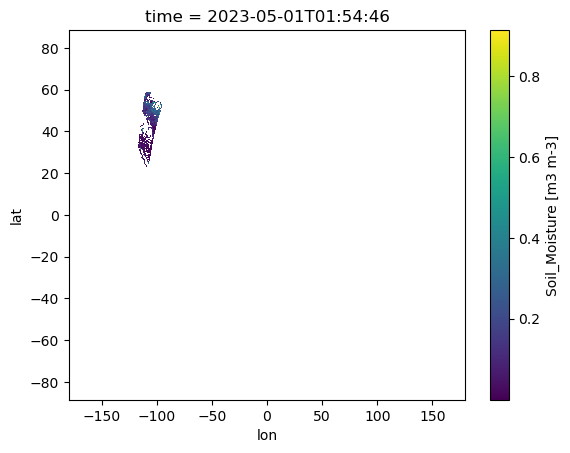

In [10]:
ds.Soil_Moisture.isel(time=0).plot.imshow()